In [29]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


In [3]:

def predictClass(score):
    if(score==0):
        return "Sane"
    elif(score==1):
        return "Mild"
    elif(score==2):
        return "Serious"
        

In [7]:
stock_data = pd.read_csv('ALZ.csv')
stock_data=stock_data.drop(['MMSE2'],axis=1)


stock_data.dropna(inplace=True)




X=stock_data.drop(['Dx'], axis=1)
y=stock_data['Dx']

train_size = int(len(stock_data)*0.8)

train=stock_data.iloc[:train_size]

In [8]:
X,y

(     Sex  Age   Edu  MoCA
 0      1   66  12.0    20
 1      1   60  12.0    22
 2      1   60   9.0    23
 3      1   79  11.0    20
 4      1   78   0.0     2
 ..   ...  ...   ...   ...
 298    0   56  18.0    22
 299    0   65   6.0    22
 300    0   80  11.0    16
 301    1   51  12.0    20
 302    1   86   0.5     7
 
 [303 rows x 4 columns],
 0      1
 1      1
 2      1
 3      1
 4      2
       ..
 298    1
 299    0
 300    2
 301    1
 302    2
 Name: Dx, Length: 303, dtype: int64)

In [25]:
X_train, y_train = train.drop(['Dx'],axis=1), train['Dx']
test=stock_data.iloc[train_size:]
X_test, y_test = test.drop(['Dx'],axis=1), test['Dx']
train_data=X_train.join(y_train)
train_data

,Sex,Age,Edu,MoCA,Dx
0,1,66,12.0,20,1
1,1,60,12.0,22,1
2,1,60,9.0,23,1
3,1,79,11.0,20,1
4,1,78,0.0,2,2
...,...,...,...,...,...
237,1,76,0.5,3,2
238,0,68,11.0,26,0
239,1,71,9.0,22,0
240,1,82,0.0,4,2


array([[<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Edu'}>,
        <Axes: title={'center': 'MoCA'}>],
       [<Axes: title={'center': 'Dx'}>, <Axes: >]], dtype=object)

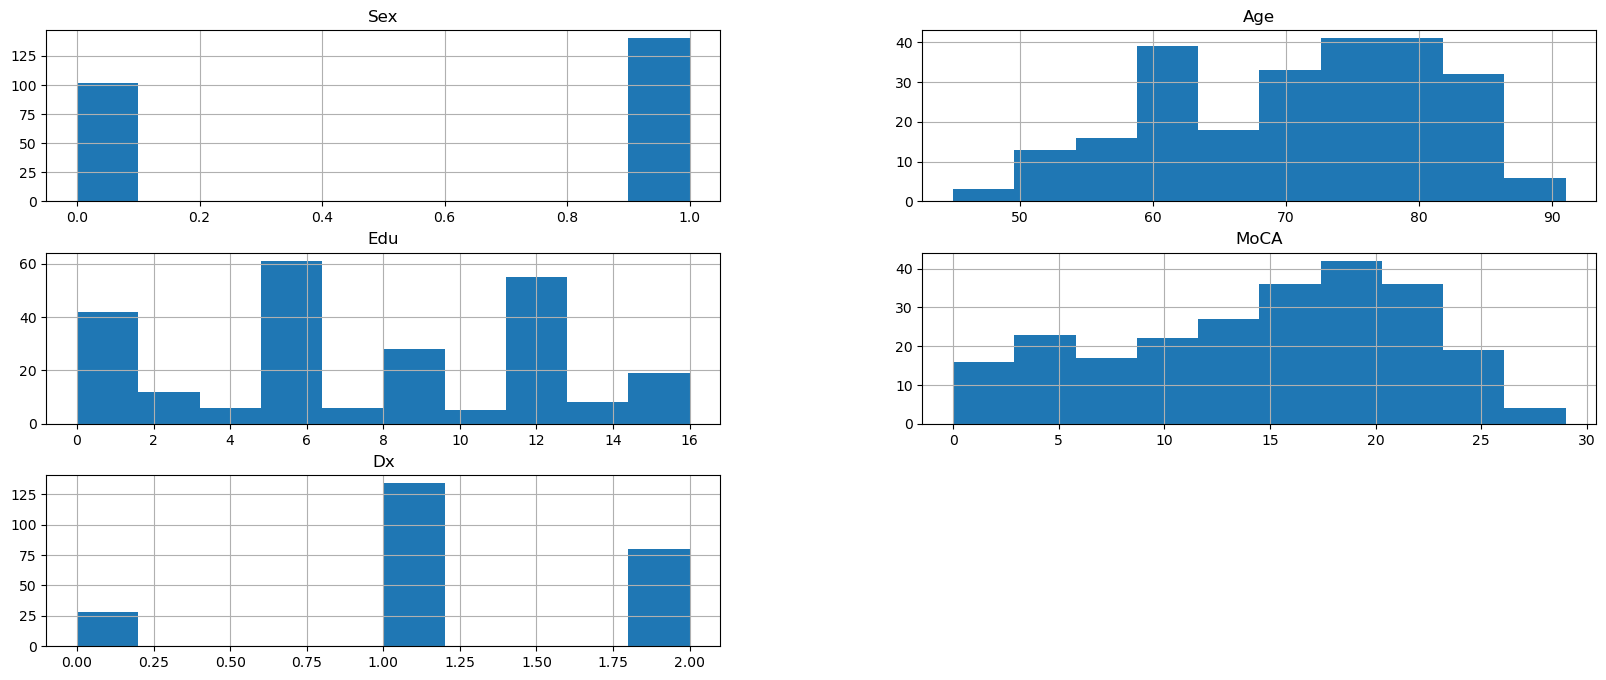

In [26]:
train_data.hist(figsize=(20,8))


<Axes: >

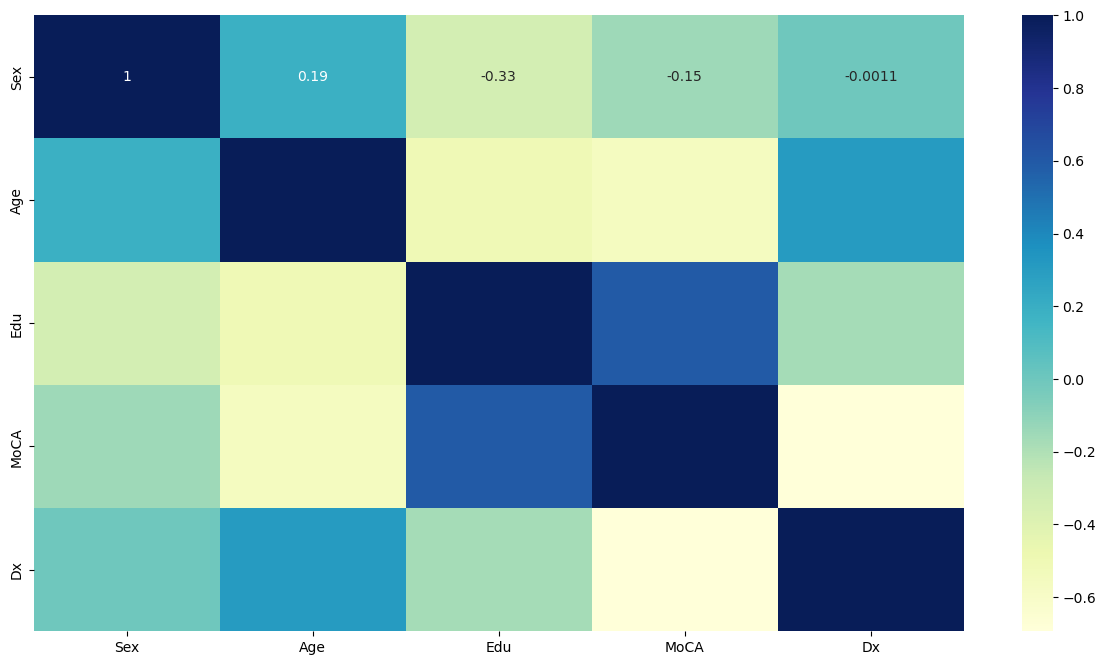

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [35]:
train_data.corr()

,Sex,Age,Edu,MoCA,Dx
Sex,1.000000,0.190104,-0.334239,-0.150907,-0.001093
Age,0.190104,1.000000,-0.504013,-0.560686,0.308748
Edu,-0.334239,-0.504013,1.000000,0.594754,-0.169342
MoCA,-0.150907,-0.560686,0.594754,1.000000,-0.693593
Dx,-0.001093,0.308748,-0.169342,-0.693593,1.000000


In [36]:
random_forest_model = RandomForestClassifier(n_estimators=500, random_state=0)
random_forest_model.fit(X_train, y_train)

# Evaluate the model
accuracy = random_forest_model.score(X_test, y_test)
print("Accuracy of RandomForestClassifier:", accuracy * 100)

# Predict the class for a new data point
new_data_point = np.array([1, 66, 12, 30]).reshape(1, -1)
predicted_class = random_forest_model.predict(new_data_point)
print("Predicted class using RandomForestClassifier:", predictClass(predicted_class))

Accuracy of RandomForestClassifier: 73.77049180327869
Predicted class using RandomForestClassifier: Sane


C:\Users\saada\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [37]:
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

accuracy = knn_model.score(X_test, y_test)
print("Accuracy of KNN:", accuracy * 100)

new_data_point = np.array([1, 66, 12, 20]).reshape(1, -1)
predicted_class = knn_model.predict(new_data_point)
print("Predicted class using KNN:", predictClass(predicted_class))

Accuracy of KNN: 75.40983606557377
Predicted class using KNN: Mild


C:\Users\saada\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
